(Versión 1.0)

# Laboratorio Redes Neuronales

En esta clase vamos a tener la primera aproximación a redes neuronales utilizando Keras. En particular, vamos a tomar como guía el problema bien conocido de clasificación de dígitos escritos manualmente.  [Aquí](https://www.tensorflow.org/datasets/catalog/mnist?hl=es-419) pueden verse su características principales.

Keras es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es una biblioteca de alto nivel, fácil de utilizar y muy popular. Puede utilizarse sobre otras bibliotecas o frameworks como Tensorflow, que provee funcionalidades y características adicionales.

Para comenzar, vamos a importar los módulos necesarios.

In [ ]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

A continuación cargamos el dataset. A diferencia de otros dataset que hemos usado, este ya viene divido en train y test, con 60.000 ejemplos de entrenamiento, y 10.000 en test.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape # 60.000 matrices de 28x28 pixeles, cada valor de la matriz es un número de 0a255 indicando el color del pixel

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
# x_train es un array de numpy
type(x_train)

numpy.ndarray

Veamos algunos ejemplos del conjunto de entrenaiento...

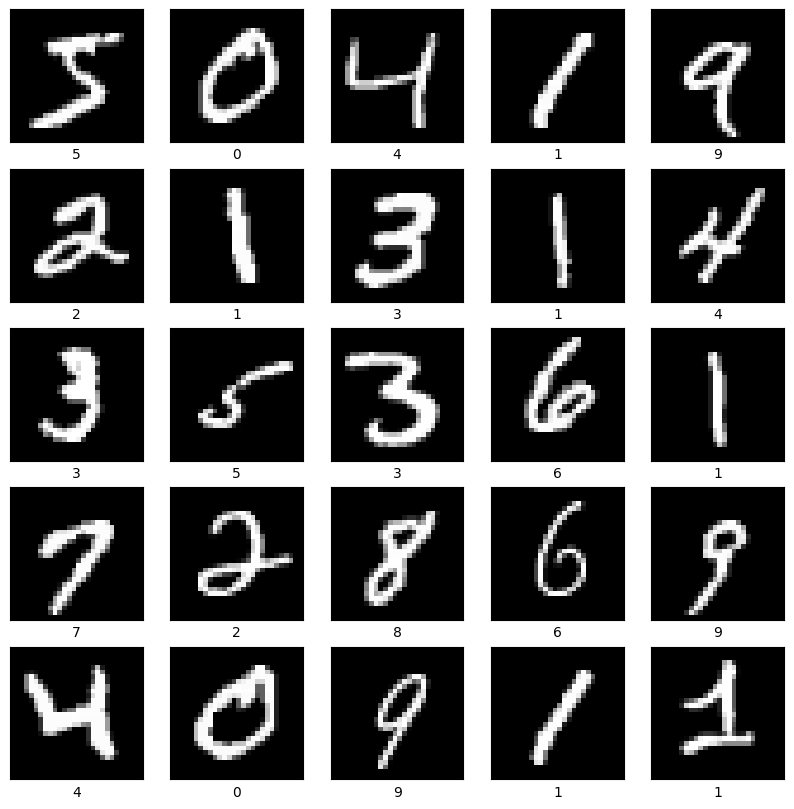

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

El dataset esta compuesto por imágenes de 28 x 28 pixeles en escala de grises, que sencillamente se representa como una matriz de enteros, de 28 x 28, cuyos valores van del 0 (negro absoluto) al 255 (completamente blanco).

De esta forma, x_train es de `(n_samples, height, weight)`.

In [ ]:
print('x_train es de ', x_train.shape)
print('x_test es de ', x_test.shape)
print('El tipo de datos es ', x_train.dtype)

x_train es de  (60000, 28, 28)
x_test es de  (10000, 28, 28)
El tipo de datos es  uint8


Si inspeccionamos el primer ejemplo de entrenamiento, vemos que el valor de los pixeles efectivamente van de 0 a 255, y que es de 28 x 28

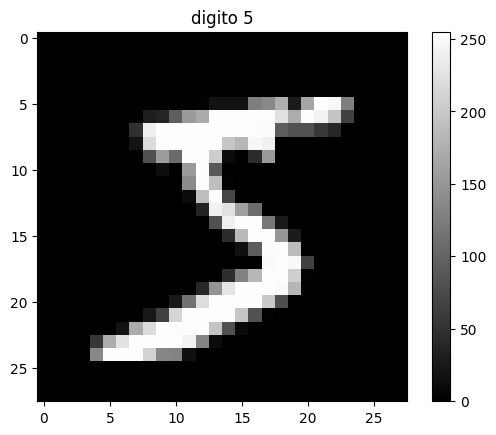

In [ ]:
plt.title("digito {}".format(y_train[0]))
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocesamiento de los datos
En la siguiente celda, vamos a preprocesar las imagenes que vamos a utilizar antes de comenzar el entrenamiento.

Para la mayoría de los datos de imágenes, los valores de píxeles son números enteros con valores entre 0 y 255.
Las redes neuronales procesan las entradas utilizando valores de peso pequeños, y las entradas con valores enteros grandes pueden interrumpir o ralentizar el proceso de aprendizaje. Como tal, es una buena práctica normalizar los valores de los píxeles para que cada valor de los píxeles tenga un valor entre 0 y 1. Además, para que no todas las entradas sean positivas podemos centrar la media a 0, favoreciendo el aprendizaje.

**Se pide**:
 - Utilizando la operacion `reshape`, convertir los ejemplos de entrenamiento de matriz a vector
 - Convertir el tipo de los datos de tipo `np.uint8` a `np.float32`
 - Dividimos el valor de cada pixel entre 255 para asegurar que todos los pixeles queden en el rango $[0,1]$
 - Restamos a cada pixel 0.5 para asegurar que todos los pixeles queden en el rango $[-0.5,0.5]$

 (Utilice variables x_train1 y x_test1 para no modificar el dataset original)



In [ ]:
######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################
# Reshape
x_train1 = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test1 = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

# Convertir tipo de datos
x_train1 = x_train1.astype(np.float32)
x_test1 = x_test1.astype(np.float32)

# Escalado de datos
x_train1 = x_train1/255.0 - 0.5
x_test1 = x_test1/255.0 - 0.5
####################################################################################################################


In [ ]:
# Verificamos que los pasos anteriores fueron correctos
assert x_train1.ndim == 2, "Deben haber 2 dimensiones, hay {}".format(x_train1.ndim)
assert x_train1.min() == -.5, "El minimo debe ser -.5 pero es {}".format(x_train1.min())
assert x_train1.max() == .5, "El minimo debe ser .5 pero es {}".format(x_train1.max())

In [ ]:
# Cuando verificamos que quedó bien, modificamos los datos originales
x_train = x_train1
x_test = x_test1

**Se pide**: Utilizando el metodo `train_test_split` se scikit-learn, tomar el 90% del conjunto de entrenamiento para entrenar, y utilizar el restante para validar, que llamaremos `x_val`, `y_val`, y que vamos a usar para tunear parametros. Utilizamos un random_state=0 para asegurar reproductibilidad.

In [ ]:
from sklearn.model_selection import train_test_split

######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 6, shuffle = True)

####################################################################################################################

# Verificamos que todo este bien
assert len(x_train) == len(y_train)
assert len(x_val) == len(y_val)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(54000, 784)
(6000, 784)


## Keras Sequential Models API
Keras provee dos grandes APIs para trabajar con modelos: secuencial y funcional. En esta clase vamos a trabajar con la primera de ellas: _Keras Sequential Models_. Esta API permite crear modelos de deep leaning a partir de una instancia de la clase `Sequential` a la que luego se le crean y agregan las capas necesarias.

Por ejemplo, las capas pueden ser definidas y pasadas a la clase Sequential como una lista:

```python
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, activation="relu", input_dim=1, name="hidden_layer"),
                    Dense(1, activation="sigmoid", name="output_layer")], name="my_model")
```

O pueden ser agregadas de a una:

```python
from keras.models import Sequential
from keras.layers import Dense
model = Sequential(name="my_model")
model.add(Dense(2, activation="relu",  input_dim=1, name="hidden_layer"))
model.add(Dense(1, activation="sigmoid", name="output_layer"))
```

En ambos casos, `model` es una red neuronal con dos capas, donde la primera tiene dos neuronas (capa oculta), y la segunda (capa de salida) tiene solo una.
`Dense` es simplemente una capa densa, también conocida como completamente conectada (fully conected).

En ambos casos, para cada capa, se indica la función de activación a utilizar. Los nombres, tanto de las capas como del modelo, son strings arbitrarios (es decir, texto) que facilitan la comprensión del modelo.

Esta clase permite desarrollar modelos para la mayoría de las aplicaciónes que vamos a ver, es muy sencilla aunque tiene sus limitaciones (por ejemplo, unicamente permite crear modelos de tipo _feed forward_).

Una vez creado el modelo, se puede ver un resumen de este con el método `summary`:
```python
model.summary()

```
Que muestra lo siguiente:
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
hidden_layer (Dense)         (None, 2)                 4         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 3         
=================================================================
Total params: 7
Trainable params: 7
Non-trainable params: 0
```




### Para la entrega: Contestar las siguientes preguntas

- ¿Cuál es la dimensión de la entrada?
- ¿por qué los parámetros de la primera capa son 4?
- ¿Por qué los de la segunda son 3?



### Respuestas:
1. La dimensión de la entrada es 1, indicada por el parámetro **input_dim**.
2. Dado que la entrada tiene una dimensión, cada neurona de la primera capa tendrá un único peso asociado, además del parámetro de sesgo. Esto totaliza en 2 parámetros por neurona. Como la primera capa tiene 2 neuronas, se tienen 4 parámetros totales.
3. La entrada de la segunda capa (de salida) es la salida de la primera capa. A su vez, la capa de salida tiene una única salida. Como la primera capa tiene 2 neuronas, los tres parámetros corresponden a los pesos asignados a la salida de las 2 neuronas de la primera capa, más el parámetro de sesgo.

### Construir el modelo

**Se pide:** definir un modelo completamente conectado, que en su capa oculta tenga 32 neuronas, y su capa de salida 10 (una para cada dígito). La capa oculta utilizará un función sigmoide, mientras que la capa de salida debe utilizar como activación la función softmax. Mostrar el resumen para el modelo dado. Cree el modelo utilizando una lista de capas y muestre el resultado

In [ ]:
x_train.shape

(54000, 784)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################
model = Sequential(name = 'my_model')
model.add(Dense(32, activation = 'sigmoid', input_dim = x_train.shape[1], name = 'hidden_layer'))
model.add(Dense(10, activation = 'softmax', name = 'output_layer'))

# Parámetros:
# 1era capa: 32x784 + 32 = 32x785 = 25120
# 2da capa: 10x32 + 10 = 330
# Total: 25450 parámetros

model.summary()
##########################################################################################


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                25120     
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilar el modelo
Luego que el modelo es definido, antes de pasar al entrenamiento, se necesita configurar algunas cosas más, que se agregan durante el paso de compilación:
 - *loss function*: función de error a minimizar. Usualmente nos referimos a ella como _loss_ o _pérdida_
 - *optimizer*: algoritmo utilizado para optimizar la función. Esto es, qué algoritmo de descenso por gradiente utilizar. Debe ser un objeto del módulo [optimizers](https://keras.io/optimizers), instanciado con los parámetros deseados, o un string indicando cuál utilizar, en cuyo caso se utilizan los valores por defecto.
 - *metrics*: métricas a ser usadas para monitorear la evolución del entrenamiento. En este ejemplo, se utiliza el acierto (accuracy)

```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```
**Se pide:** Compilar el modelo con la función [compile](https://keras.io/models/sequential/#compile), utilizando como optimizador una instancia de SGD, que tenga *learning rate* (`lr=0.01`), y los demás parámetros como en el ejemplo dado.

In [ ]:
from keras.optimizers import SGD

######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################
model.compile(optimizer = SGD(learning_rate = 0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
##########################################################################################



### Entrenar el modelo
Este paso es en el que efectivamente se entrena la red. Se deben indicar algunos parámetros más, como los ejemplos de entrenamiento y validación, la cantidad de épocas y el tamaño del batch. Todo esto se hace con la función [fit](https://keras.io/api/models/model_training_apis/#fit-method).

- Epoch = una pasada hacia adelante y una pasada hacia atrás de todos los ejemplos de entrenamiento
- Batch Size = el número de ejemplos de entrenamiento en una pasada forward/backward.
- Iteración = una iteración realiza una pasada forward/backward de “Batch Size” número de ejemplos.

Ejemplo: si tiene 1000 ejemplos de entrenamiento y el tamaño del batch es 500, se necesitarán 2 iteraciones para completar 1 época.

El término "Batch" es ambiguo: algunas personas lo usan para designar el conjunto de entrenamiento completo, y algunas personas lo usan para referirse a la cantidad de ejemplos de entrenamiento en una pasada forward/backward. Para evitar esa ambigüedad y dejar en claro que el Batch corresponde al número de ejemplos de entrenamiento en una pasada forward/backward, se puede usar el término mini Batch.

**Se pide**: entrenar el modelo con un batch_size de 32, durante 10 épocas. Utilice los datos de validación para ver la evolución de la accuracy.

In [ ]:
######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################
model.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          validation_data = (x_val, y_val)
          )
##########################################################################################


Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.7322 - accuracy: 0.5871 - val_loss: 1.2285 - val_accuracy: 0.7420
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.9726 - accuracy: 0.7896 - val_loss: 0.7844 - val_accuracy: 0.8175
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6918 - accuracy: 0.8405 - val_loss: 0.6069 - val_accuracy: 0.8542
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8638 - val_loss: 0.5138 - val_accuracy: 0.8737
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4920 - accuracy: 0.8757 - val_loss: 0.4569 - val_accuracy: 0.8817
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8852 - val_loss: 0.4185 - val_accuracy: 0.8898
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8905 - val_loss: 0.3917 - val_accuracy:

### Preguntas a contestar
- En nuestro entrenamiento: ¿Cuántas iteraciones tendremos por época?
- ¿En cada época se usan los mismos ejemplos de entrenamiento? ¿Por qué será?

____________________________________________________________________________________

Durante el entrenamiento, se muestra el progreso en salida estándar. Una vez terminado, es importante visualizar cómo evolucionó el modelo durante el entrenamiento. El comportamiento de las distintas métricas durante el entrenamiento arrojan pistas sobre qué está pasando.

En model.history queda el registro histórico de qué sucedió con la `accuracy` y `loss` durante el entrenamiento para ambos conjuntos.

### Respuestas
1. Dado que se tienen 54000 datos de entrenamiento, y que se opta por utilizar un batch size igual a 32, se deberán completar 54000/32 = 1688 iteraciones por cada época.
2. En cada época se utilizan los mismos datos de entrenamiento (los incluidos en x_train), pero se utilizan en distinto orden, ya que en cada época se generan aleatoriamente los batches del set de entrenamiento. Entonces, un dato utilizado en la primera iteración de una época probablemente sea utilizado en una iteración distinta para la segunda época.

  Asimismo, si se utiliza descenso por gradiente mini-batch, se está agregando aleatoriedad al problema, ya que no se consideran todos los datos de entrenamiento en simultáneo para la definición de la función de costo y sus gradientes. En virtud de esto, considerar varias épocas con batches conformados por datos distintos y utilizando dichos datos en distinto orden ayuda al proceso de aprendizaje, permitiendo que el algoritmo pueda encontrar una solución más robusta y que generalice mejor.

  Por último, cabe destacar que el algoritmo de descenso por gradiente seguirá ajustando los pesos con cada pasada que se haga por el set de entrenamiento. Dado que las redes neuronales feed-forward generalmente tienen una gran cantidad de parámetros, es probable que los pesos hallados luego de una época no sean los óptimos. Más épocas permitirán ajustar mejor los pesos hasta encontrar los que mejor minimizan la función de costo.
  

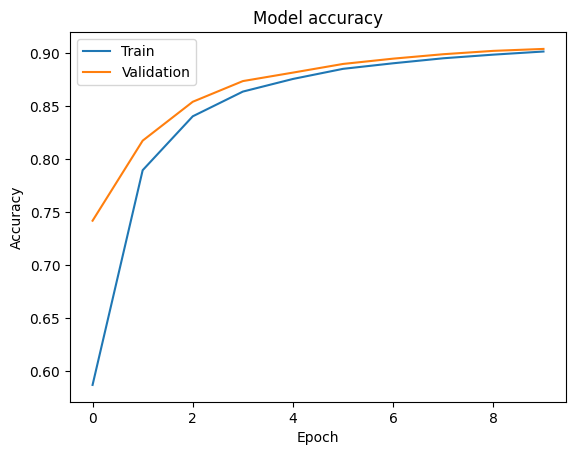

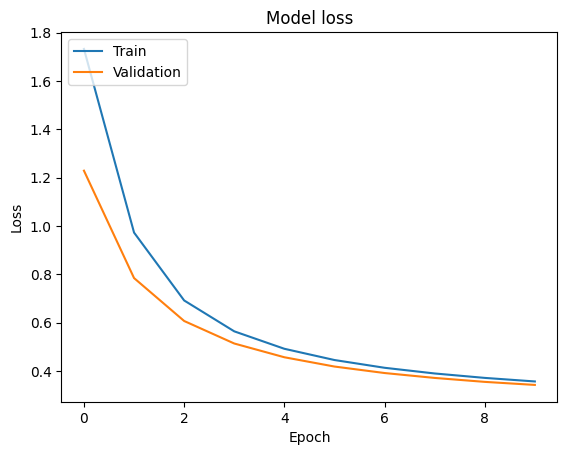

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.clf()

# Invocamos a la función plot_history para ver cómo se comportó
plot_history(model.history)

### Pregunta a contestar
¿Qué conclusiones sacamos de nuestro primer modelo elegido? ¿Está aprendiendo?

### Predecir
Una vez que tenemos el modelo entrenado, es interesante hacer predicciones sobre distintas instancias. Para esto se cuenta con el método `predict`. Este método nos devuelve una matriz de dimenciones (n_samples, n_classes), donde cada fila contiene el valor de la función softmax para cada instancia clasificada.

### Respuesta
Es posible apreciar que, con cada época, el costo va disminuyendo y la accuracy del modelo va aumentando. Esto ocurre tanto para el dataset de entrenamiento como para el de validación, lo que sugiere que el modelo está aprendiendo correctamente sin mostrar señales de sobreajuste.

In [ ]:
predictions = model.predict(x_val)
predictions.shape

188/188 [==============================] - 0s 2ms/step


(6000, 10)

El siguiente vector contiene la predicción para el primer ejemplo de evaluación. El valor de cada entrada se puede interpretar como una probabilidad, y cada entrada de este vector contiene la probabilidad de que el ejemplo pertenezca a la respectiva clase.

In [ ]:
predictions[0]

array([9.7130919e-01, 7.3204469e-06, 1.2562986e-03, 2.5319066e-03,
       7.6965800e-05, 1.9543232e-02, 6.7179411e-04, 1.1974243e-03,
       2.7652716e-03, 6.4052013e-04], dtype=float32)

Utilizando la función de numpy np.argmax podemos obtener, para cada instancia, cuál es la clase que tiene mayor probabilidad, y utilizar esta clase como nuestra predicción

In [ ]:
y_val_pred = np.argmax(predictions, axis=1)
y_val_pred

array([0, 1, 3, ..., 7, 3, 4])

**Se pide**: imprimir imagen del primer ejemplo de x_val y valor de predicción de nuestro modelo para dicha imagen. ¿El modelo funcionó bien?

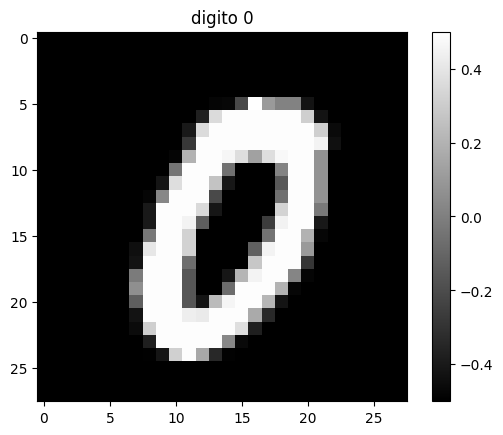

In [ ]:
######################################## COMPLETAR SEGÚN LO PEDIDO ##################################################
plt.title("digito {}".format(y_val_pred[0]))
plt.imshow(x_val[0].reshape(28,28), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
##########################################################################################


Es posible apreciar que la predicción del modelo es correcta para el primer dato del conjunto de validación.

Una vez que tenemos las predicciones hechas por la red, y sus valores reales, se puede utilizar cualquier métrica del módulo [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) que hemos usado antes:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.950     0.964     0.957       590
           1      0.950     0.956     0.953       661
           2      0.893     0.869     0.881       587
           3      0.894     0.856     0.875       624
           4      0.900     0.927     0.913       613
           5      0.846     0.843     0.845       542
           6      0.934     0.947     0.940       623
           7      0.910     0.921     0.915       604
           8      0.881     0.867     0.874       557
           9      0.866     0.876     0.871       599

    accuracy                          0.904      6000
   macro avg      0.903     0.903     0.902      6000
weighted avg      0.904     0.904     0.904      6000



En este punto se espera que tengan un manejo mínimo de keras como para entrenar un modelo. En los próximos pasos, el objetivo es entender qué efecto tiene cada parámetro.

#### Learning Rate

**Se pide**: Implementar un modelo  igual al anterior, pero cambiando la función de activación a relu. Entrenarlo durante 10 épocas, con `lr=2`, `lr=.01` y `lr=1e-6`. En cada caso graficar la evolución del error durante el entrenamiento. ¿Qué diferencias se observan? ¿A qué se atribuye? ¿Cuál funciona mejor?

Probamos lr=2
Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4584 - accuracy: 0.1032 - val_loss: 2.3234 - val_accuracy: 0.0998
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3177 - accuracy: 0.1029 - val_loss: 2.3143 - val_accuracy: 0.1102
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3178 - accuracy: 0.1015 - val_loss: 2.3319 - val_accuracy: 0.1038
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3168 - accuracy: 0.1026 - val_loss: 2.3246 - val_accuracy: 0.0978
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3170 - accuracy: 0.1020 - val_loss: 2.3254 - val_accuracy: 0.0998
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3170 - accuracy: 0.1012 - val_loss: 2.3147 - val_accuracy: 0.1102
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3167 - accuracy: 0.1024 - val_loss: 2.3164 -

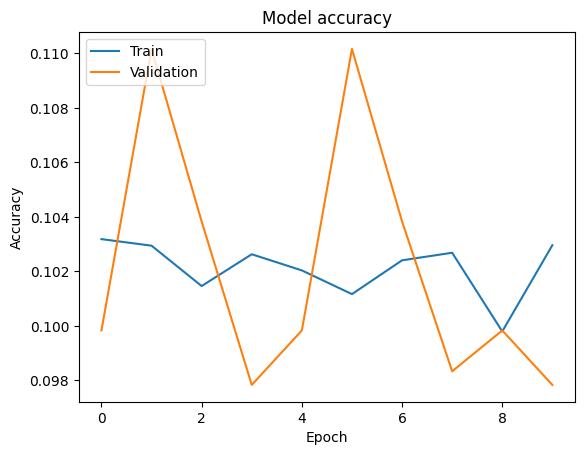

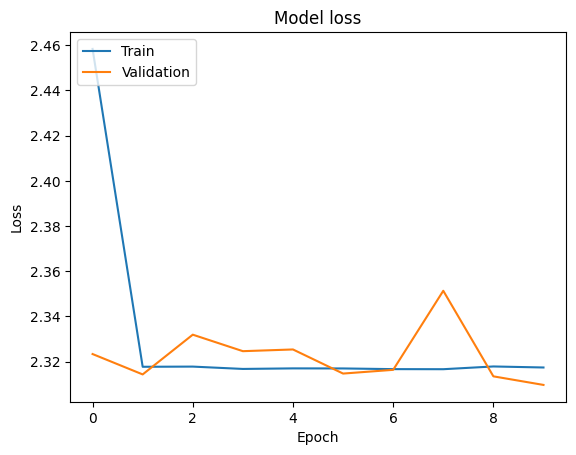

Probamos lr=0.01
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7374 - accuracy: 0.7977 - val_loss: 0.4290 - val_accuracy: 0.8823
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8912 - val_loss: 0.3376 - val_accuracy: 0.9030
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3309 - accuracy: 0.9040 - val_loss: 0.3083 - val_accuracy: 0.9068
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3052 - accuracy: 0.9122 - val_loss: 0.2854 - val_accuracy: 0.9145
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2869 - accuracy: 0.9170 - val_loss: 0.2725 - val_accuracy: 0.9205
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.9219 - val_loss: 0.2569 - val_accuracy: 0.9263
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9246 - val_loss: 0.246

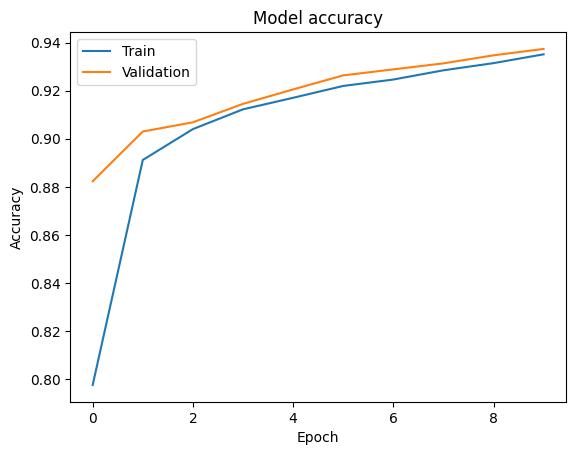

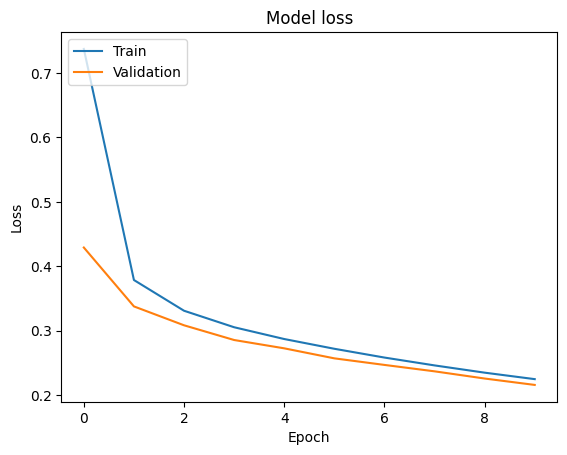

Probamos lr=1e-06
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.4453 - accuracy: 0.1284 - val_loss: 2.4408 - val_accuracy: 0.1285
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4369 - accuracy: 0.1277 - val_loss: 2.4326 - val_accuracy: 0.1268
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4288 - accuracy: 0.1266 - val_loss: 2.4249 - val_accuracy: 0.1253
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4212 - accuracy: 0.1257 - val_loss: 2.4175 - val_accuracy: 0.1250
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4140 - accuracy: 0.1246 - val_loss: 2.4105 - val_accuracy: 0.1237
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 2.4070 - accuracy: 0.1236 - val_loss: 2.4039 - val_accuracy: 0.1235
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.4004 - accuracy: 0.1224 - val_loss: 2.39

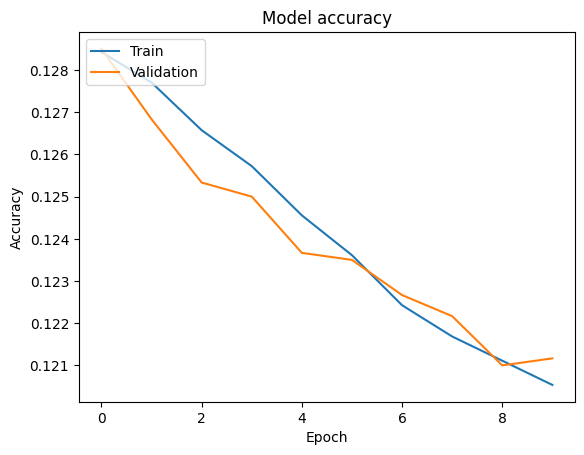

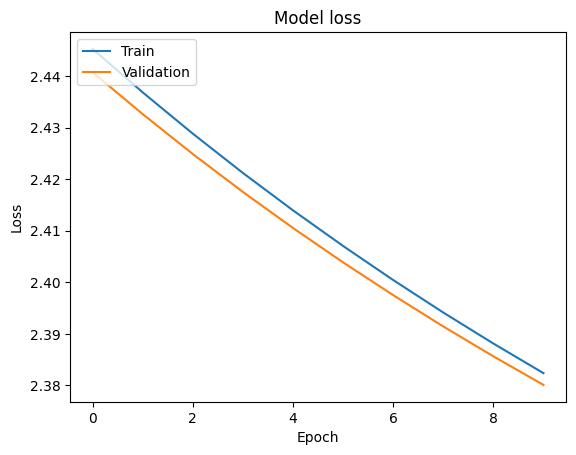

<Figure size 640x480 with 0 Axes>

In [ ]:
for lr in [2,.01,1e-6]:
    print('Probamos lr={}'.format(lr))
    # DEFINIR EL MODELO
    model = Sequential(name = 'my_model')
    model.add(Dense(32, activation = 'relu', input_dim = x_train.shape[1], name = 'hidden_layer'))
    model.add(Dense(10, activation = 'softmax', name = 'output_layer'))

    # COMPILARLO CON EL LR ADECUADO
    model.compile(
                optimizer = SGD(learning_rate = lr),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    # ENTRENAR
    model.fit(x = x_train,
              y = y_train,
              epochs = 10,
              batch_size = 32,
              validation_data = (x_val, y_val)
              )
    # MOSTRAR HISTÓRICO DE ENTRENAMIENTO
    plot_history(model.history)


### Respuestas

#### **lr = 2**
Para el primer caso (lr = 2), es posible ver un comportamiento oscilatorio en la accuracy del modelo, aunque los valores entre los cuales oscila son bajos y cercanos entre ellos (entre 0.09 y 0.11). Este comportamiento sugiere que el learning rate utilizado puede ser demasiado grande. En cada iteración, el vector de pesos para la siguiente iteración es hallado en función del vector de pesos de la iteración anterior, mediante la siguiente expresión:

$$
θ^{i+1} = θ^i - \alpha∇L(θ^i)
$$

Siendo $\theta^i$ y $\theta^{i+1}$ el vector de pesos en la iteración $i$ e $i+1$ respectivamente, $L$ la función de costo y $α$ el learning rate. De esta manera, el parámetro $\alpha$ controla qué tanto se mueve el vector de parámetros $\theta$, en dirección opuesta a la dirección de mayor crecimiento, respecto al vector anterior. Si dicho parámetro toma un valor demasiado grande, es probable que el vector $\theta^{i+1}$ saltee el valor que minimiza la función de costo y que se obtenga un valor en la región donde la función vuelve a crecer. Luego, al calcular el próximo vector $\theta^{i+2}$, probablemente ocurra lo mismo pero hacia el otro lado, oscilando así en torno al mínimo pero nunca alcanzándolo. Si se analiza la gráfica de la función de costo, es posible ver que la misma desciende en la primera época y luego se mantiene constante. Esto también puede sugerir que, luego de moverse en la dirección correcta, se mantiene oscilando en torno a un mínimo pero nunca moviéndose hacia él.

#### **lr = 1e-06**
Para el tercer caso (lr = 1e-6), es posible ver que la accuracy del modelo tiene una tendencia creciente, mientras que la función de costo tiene una tendencia decreciente. Sin embargo, los valores indicados en dichas gráficas son muy similares entre ellos, lo que indica que el ratio de crecimiento de la accuracy y de decrecimiento de la función de pérdida es muy bajo. Esto sugiere que, si bien el modelo parece estar aprendiendo, parece hacerlo muy lentamente, lo que puede deberse a que el valor de $α$ sea demasiado bajo. Viendo la expresión anterior, es posible deducir que si el valor $α$ es muy bajo, el algoritmo podrá moverse en la dirección correcta, pero los vectores $\theta$ encontrados variarán muy poco, aproximándose muy lentamente al vector que minimiza la función de costo. En este caso, es esperable que si se entrena el modelo por un período más largo de tiempo igualmente se llegue a una solución, pero de manera mucho más lenta.

#### **lr = 0.01**
Para el segundo caso (lr = 0.01), es posible ver que la accuracy del modelo crece más rápidamente, mientras que la función de costo decrece más rápidamente. Asimismo, ambas alcanzan valores razonables, lo que sugiere una buena performance del modelo. Incluso se aprecia que la accuracy para el conjunto de validación es, en general, mayor a la del conjunto de entrenamiento, lo que sugiere buen poder de generalización del modelo. Se concluye, entonces, que el valor de $α$ elegido en este caso es aceptable y razonable.  


### Regularización

En la siguiente sección, vamos a robustecer al modelo, utilizando regularización L2 en su capa oculta. Esto es, dada la función de costo que estamos minimizando:
$$L(W) = \sum_{i=1}^{n} L_i(W) $$
agregar una penalizacion a los pesos
$$L(W) = \sum_{i=1}^{n} L_i(W)+ \lambda \frac{1}{2} |W|^{2}_{2}$$

Se encuentra [implementado en keras](https://keras.io/regularizers/) en el modulo `regularizers`, y hay que pasarlo como parametro al crear la capa oculta que se desea regularizar:

```python
from keras import regularizers
model.add(Dense(64, input_dim=64, activation="sigmoid",
                kernel_regularizer=regularizers.l2(0.01)))
```

El único parámetro que recibe es el $\lambda$, que indica cuanto peso tiene la regularización.

**Se pide**: Entrenar el modelo con el learning rate seleccionado el paso anterior, utilizando $\lambda = 1$ y $\lambda=1e-3$. En ambos casos, graficar la evolución del error.
¿Qué diferencias se observan? ¿A qué se atribuye? ¿Cuál funciona mejor?

Probamos l=1
Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 3.4688 - accuracy: 0.1222 - val_loss: 2.3017 - val_accuracy: 0.1102
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3017 - val_accuracy: 0.1102
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3018 - val_accuracy: 0.1102
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3017 - val_accuracy: 0.1102
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3016 - val_accuracy: 0.1102
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3017 - val_accuracy: 0.1102
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3018 - 

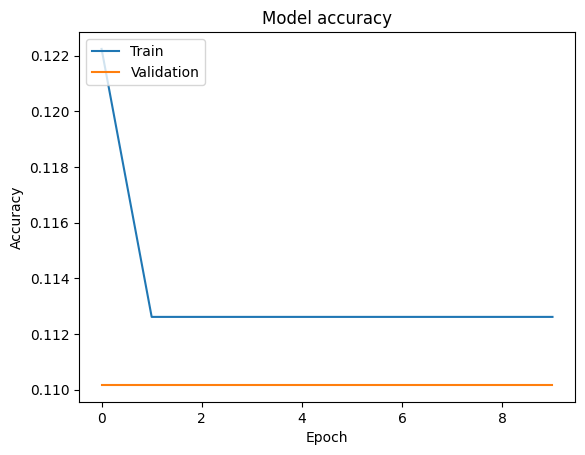

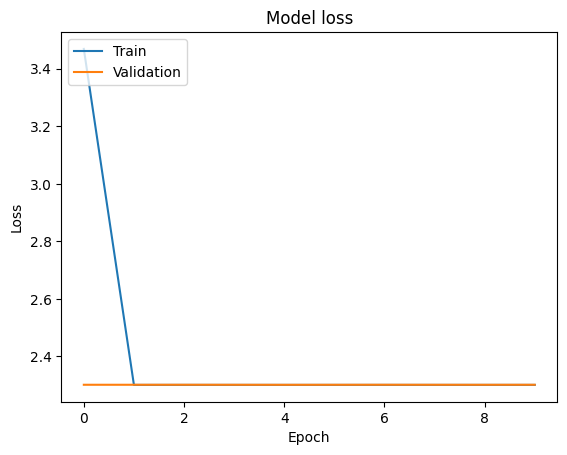

Probamos l=0.001
Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8737 - accuracy: 0.7826 - val_loss: 0.5189 - val_accuracy: 0.8812
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4856 - accuracy: 0.8913 - val_loss: 0.4463 - val_accuracy: 0.9027
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4411 - accuracy: 0.9038 - val_loss: 0.4168 - val_accuracy: 0.9087
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4184 - accuracy: 0.9091 - val_loss: 0.3963 - val_accuracy: 0.9137
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.9148 - val_loss: 0.3821 - val_accuracy: 0.9187
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3879 - accuracy: 0.9189 - val_loss: 0.3720 - val_accuracy: 0.9213
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.9224 - val_loss: 0.359

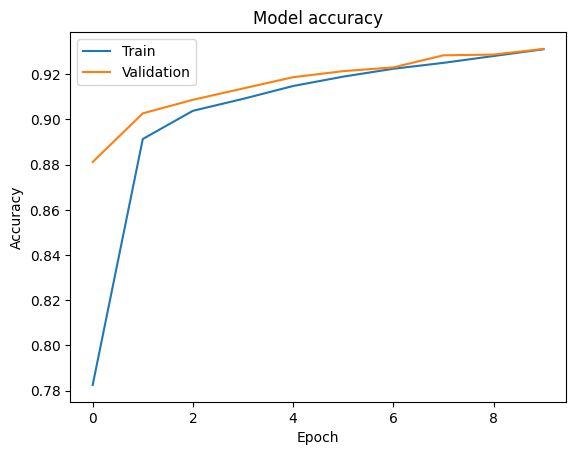

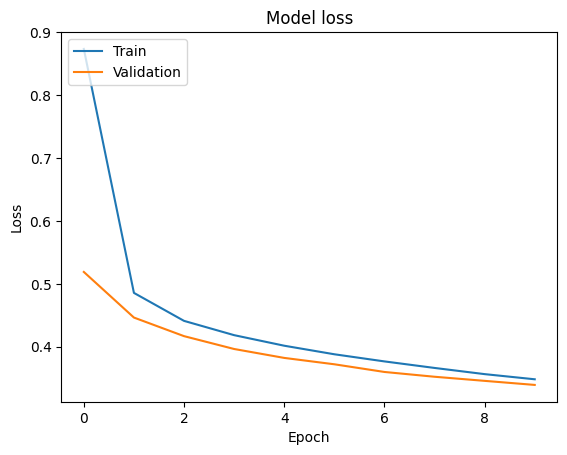

<Figure size 640x480 with 0 Axes>

In [ ]:
from keras import regularizers

weights = []
for l in [1,1e-3]:
    print('Probamos l={}'.format(l))

    # DEFINIR EL MODELO
    model = Sequential(name = 'my_model')
    model.add(Dense(32, activation = 'relu', input_dim = x_train.shape[1], name = 'hidden_layer', kernel_regularizer = regularizers.l2(l)))
    model.add(Dense(10, activation = 'softmax', name = 'output_layer', kernel_regularizer = regularizers.l2(l)))

    # COMPILAR EL MODELO
    model.compile(
                optimizer = SGD(learning_rate = 0.01),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  # ENTRENAR EL MODELO
    model.fit(x = x_train,
              y = y_train,
              epochs = 10,
              batch_size = 32,
              validation_data = (x_val, y_val)
              )

    hidden_layer = model.get_layer('hidden_layer')
    weights_hidden_layer = hidden_layer.get_weights() # matriz de pesos para capa oculta
    weights.append (weights_hidden_layer) # listado con matrices de pesos de capa oculta para cada modelo

    # MOSTRAR HISTÓRICO DE ENTRENAMIENTO
    plot_history(model.history)


In [ ]:
print ("Pesos máximos de cada neurona - lambda = 1")
print(np.max(weights[0][0],axis = 0))

print ("\nPesos máximos de cada neurona - lambda = 0.0001")
print(np.max(weights[1][0],axis = 0))


Pesos máximos de cada neurona - lambda = 1
[5.8772749e-37 5.9903505e-07 5.8770014e-37 5.8772067e-37 5.8765054e-37
 4.5747359e-07 5.8772067e-37 6.3411744e-07 3.1681998e-07 7.6354780e-07
 5.8770014e-37 7.0187599e-07 5.8773417e-37 5.8772067e-37 5.8763305e-37
 6.7960167e-07 5.8760175e-37 5.8772830e-37 5.8772830e-37 5.9547392e-07
 5.8772475e-37 5.0172844e-07 2.0300502e-07 5.8774498e-37 5.8773417e-37
 5.8770014e-37 3.1386421e-07 9.1169241e-08 3.6327253e-07 5.8774471e-37
 5.8773857e-37 5.8773417e-37]

Pesos máximos de cada neurona - lambda = 0.0001
[0.19033742 0.061241   0.16123888 0.21499641 0.17738399 0.15030487
 0.14651163 0.16745643 0.17890133 0.19725955 0.12862507 0.12638298
 0.23039947 0.17603162 0.13311745 0.17262712 0.12253357 0.20651427
 0.0822904  0.17527024 0.06273093 0.22858745 0.09727495 0.17975678
 0.15907015 0.17358562 0.22805905 0.21918213 0.16380052 0.17993978
 0.09885013 0.13282089]


### **Respuestas**
**¿Qué diferencias se observan? ¿A qué se atribuye? ¿Cuál funciona mejor?**

En primer lugar, es posible ver que el comportamiento del modelo con $\lambda = 0.001$ es muy similar al del modelo sin regularización. Esto sugiere que el valor de $\lambda$ utilizado es muy pequeño, y por tanto la penalización impuesta en los pesos altos no es suficiente como para generar alguna diferencia signficativa en el modelo.

Por el otro lado, el modelo con $\lambda = 1$ presenta un comportamiento distinto. Para el conjunto de validación, tanto el valor de accuracy como el de pérdida se mantienen constantes entre épocas, mientras que el conjunto de entrenamiento tiene un comportamiento similar, con una baja inicial en ambas cantidades. Si se compara estos valores con los valores obtenidos en el modelo sin regularización, es posible ver que la accuracy es muy baja y la pérdida muy alta para ambos conjuntos, lo que sugiere que el modelo no se está ajustando a los datos de entrenamiento, es decir, no está aprendiendo bien. Esto puede sugerir que el valor de $\lambda$ utilizado es excesivamente alto, penalizando los pesos de manera muy severa y así impidiendo que el modelo aprenda correctamente. Más evidencia a favor de esta hipótesis surge si se analizan los pesos obtenidos para ambos modelos. En la celda de código anterior, se imprimen los pesos máximos de cada neurona de la capa oculta para cada modelo. Es posible ver que los pesos obtenidos en el modelo con $\lambda = 1$ son mucho más pequeños que los obtenidos para $\lambda=0.001$. Esto ocurre porque la penalización está siendo realizada sobre la norma de la matriz de pesos. Cuando el valor de $\lambda$ crece, el valor de $\lambda \frac{1}{2} |W|^{2}_{2}$ también crece, por lo que los pesos aprendidos deben ser más pequeños para lograr minimizar la función de costos. En virtud de esto, y dado que los resultados obtenidos para $\lambda=0.001$ son buenos, se deduce que el $\lambda=1$ constituye un valor excesivo para la regularización.

### Más capas, menos neuronas...

Implementar un modelo similar al anterior, pero que en vez de tener una única capa oculta con 32 neuronas, contenga 3 capas ocultas con 5 neuronas cada una.

Compilarlo, y entrenarlo con la misma configuración usada en pasos anteriores (utilice sigmoid en la primera capa oculta, y relu en las restantes). Mostrar cómo cambió su desempeño durante el entrenamiento. Mostrar el resumen del modelo con `model.summary()`

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 3925      
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 30        
                                                                 
 hidden_layer_3 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 10)                60        
                                                                 
Total params: 4045 (15.80 KB)
Trainable params: 4045 (15.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 2.2780 - accuracy: 0.1291 - val_loss: 2.2094 - val_accuracy: 0.1763
Epoch 2

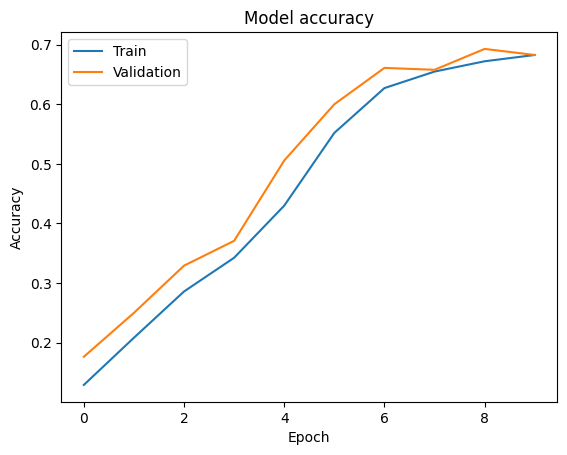

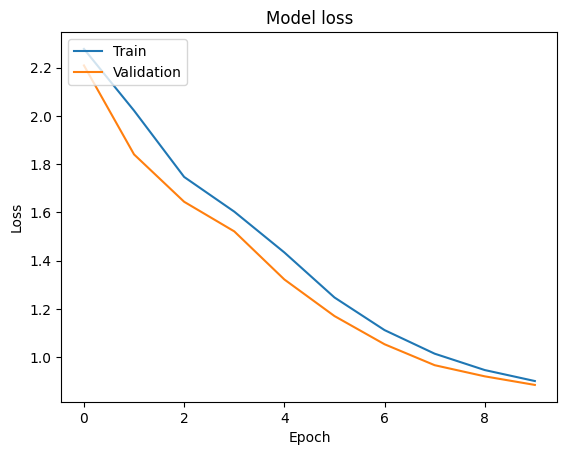

<Figure size 640x480 with 0 Axes>

In [ ]:
# DEFINIR EL MODELO Y MOSTRAR EL RESUMEN
model = Sequential(name = 'my_model')
model.add(Dense(5, activation = 'sigmoid', input_dim = x_train.shape[1], name = 'hidden_layer_1'))
model.add(Dense(5, activation = 'relu', name = 'hidden_layer_2'))
model.add(Dense(5, activation = 'relu', name = 'hidden_layer_3'))
model.add(Dense(10, activation = 'softmax', name = 'output_layer'))

print (model.summary())

# COMPILAR EL MODELO
model.compile(
            optimizer = SGD(learning_rate = 0.01),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          validation_data = (x_val, y_val)
          )

# MOSTRAR HISTÓRICO DE ENTRENAMIENTO
plot_history(model.history)


### Batch normalization

A continuación, vamos a aplicar batch normalization (una forma de regularización) al modelo anterior.

Batch normalization debe ser aplicado inmediatamente **después** de computar las preactivacion, pero **antes** de aplicar la función de activación. Sin embargo, en los ejemplos vistos, ambas operaciones la ejecuta la misma capa:

```python
model.add(Dense(64, input_dim=64, activation="sigmoid",
      kernel_regularizer=regularizers.l2(0.01)))
```

Para aplicar batch normalization, se debe utilizar una funcion de activacion lineal en la capa densa, luego agregar la capa de batch normalization, y por ultimo agregar explicitamente la capa de activacion que querramos usar. El ejemplo anterior, se reescribe como sigue:

```python
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model.add(Dense(64, input_dim=64, # no especificar activacion!
          kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

```

**Opcional: se pide:** Entrenar nuevamente el modelo, esta vez agregando batch normalization a cada capa. Mostrar el desarrollo del entrenamiento y el resumen del modelo. ¿Qué se puede decir de este modelo en comparación con el anterior? ¿y con los anteriores a este? (1 capa oculta de 32 neuronas)

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 3925      
                                                                 
 batch_normalization_16 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_16 (Activation)  (None, 5)                 0         
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 30        
                                                                 
 batch_normalization_17 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_17 (Activation)  (None, 5)                 0  

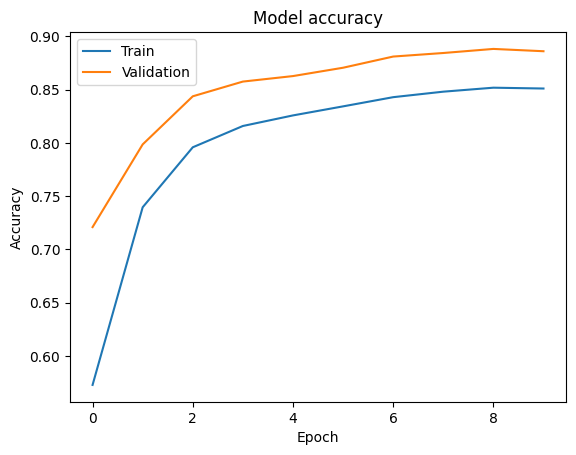

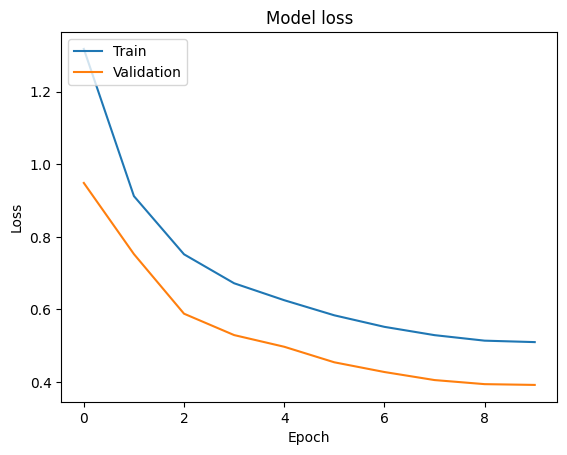

<Figure size 640x480 with 0 Axes>

In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

# DEFINIR EL MODELO Y MOSTRAR RESUMEN
# Input layer
model_norm = Sequential(name = 'my_model')
model_norm.add(Dense(5, input_dim = x_train.shape[1], name = 'hidden_layer_1'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('sigmoid'))

# Hidden layer 2
model_norm.add(Dense(5, name = 'hidden_layer_2'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

# Hidden layer 3
model_norm.add(Dense(5, name = 'hidden_layer_3'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

# Output layer
model_norm.add(Dense(10, name = 'output_layer'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('softmax'))

print (model_norm.summary())

# COMPILAR EL MODELO
model_norm.compile(
            optimizer = SGD(learning_rate = 0.01),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model_norm.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          validation_data = (x_val, y_val)
          )

# MOSTRAR ENTRENAMIENTO
plot_history(model_norm.history)

### **Respuestas**
**¿Qué se puede decir de este modelo en comparación con el anterior? ¿y con los anteriores a este? (1 capa oculta de 32 neuronas)**

Es posible apreciar que el modelo arroja resultados significativamente mejores al introducir Batch Normalization en todas las capas. Mirando el conjunto de validación, se pasa de un valor de accuracy de 0.68 a uno de 0.88, mientras que la pérdida pasa de 0.88 a 0.39.

Asimismo, si se lo compara con el modelo de una capa con 32 neuronas, es posible apreciar que los resultados son comparables, si bien los obtenidos anteriormente son un poco mejores. En particular, se obtenían valores de accuracy y pérdida de 0.93 y 0.34 respectivamente, en comparación con los actuales de 0.88 y 0.42. Sin embargo, lo destacable en este caso es que los resultados son obtenidos con una cantidad de parámetros considerablemente menor. Para el primer caso, se tenían 25450 parámetros entrenables, mientras que para el caso actual, se tienen únicamente 4095, es decir una sexta parte de la cantidad de parámetros original. Dado que la capacidad de una red crece exponencialmente con la profundidad pero polinomialmente con la cantidad de neuronas, es coherente que se obtengan resultados comparables con el modelo de menor cantidad total de neuronas pero mayor cantidad de capas. Esto también es favorable debido a que utilizar menos parámetros reduce la probabilidad de sobreajuste, así como el costo computacional del entrenamiento.

Por último, también es posible apreciar que, si bien el modelo había bajado el ritmo de aprendizaje en las últimas épocas, el mismo continuaba aprendiendo, por lo que también es esperable tener resultados un poco mejores aumentando la cantidad de épocas, o aumentando el learning rate. A continuación se define el mismo modelo, pero aumentando el learning rate de 0.01 a 0.05. Se opta por esto porque aumentar la cantidad de épocas puede contribuir al sobreajuste, además de que el uso de Batch Normalization a veces permite el uso learning rates mayores. Es posible ver como el valor de accuracy mejora un poco, mientras que la pérdida total disminuye.

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 3925      
                                                                 
 batch_normalization_24 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 5)                 0         
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 30        
                                                                 
 batch_normalization_25 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 5)                 0  

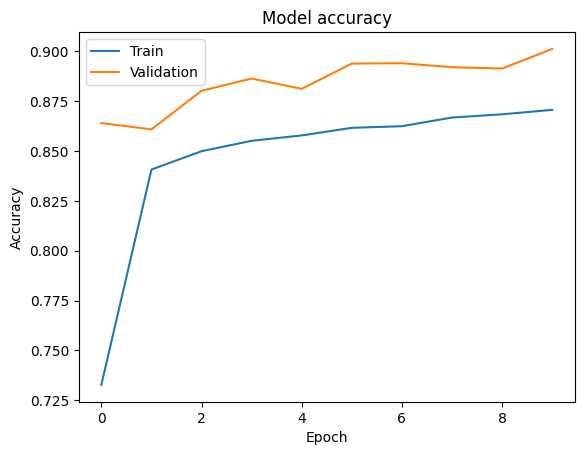

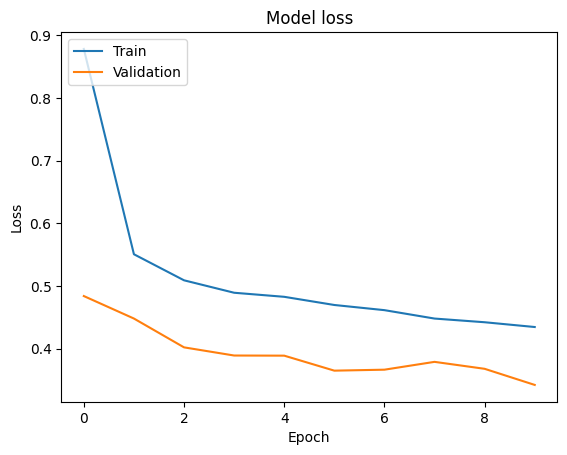

<Figure size 640x480 with 0 Axes>

In [ ]:
# MODELO CON LEARNING RATE = 0.05
# DEFINIR EL MODELO Y MOSTRAR RESUMEN
# Input layer
model_norm = Sequential(name = 'my_model')
model_norm.add(Dense(5, input_dim = x_train.shape[1], name = 'hidden_layer_1'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('sigmoid'))

# Hidden layer 2
model_norm.add(Dense(5, name = 'hidden_layer_2'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

# Hidden layer 3
model_norm.add(Dense(5, name = 'hidden_layer_3'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

# Output layer
model_norm.add(Dense(10, name = 'output_layer'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('softmax'))

print (model_norm.summary())

# COMPILAR EL MODELO
model_norm.compile(
            optimizer = SGD(learning_rate = 0.05),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model_norm.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          validation_data = (x_val, y_val)
          )

# MOSTRAR ENTRENAMIENTO
plot_history(model_norm.history)

**OPCIONAL: Se pide:** Repetir el experimento anterior, cambiando la función de activación a sigmoid, pero utilizar como algoritmo de descenso por gradiente Rmsprop, con sus parámetros por defecto.

Comparar resultados con el escenario anterior.

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 3925      
                                                                 
 batch_normalization_28 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_28 (Activation)  (None, 5)                 0         
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 30        
                                                                 
 batch_normalization_29 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 activation_29 (Activation)  (None, 5)                 0  

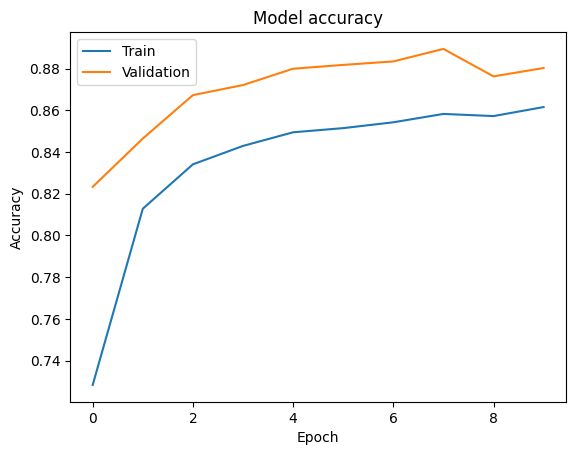

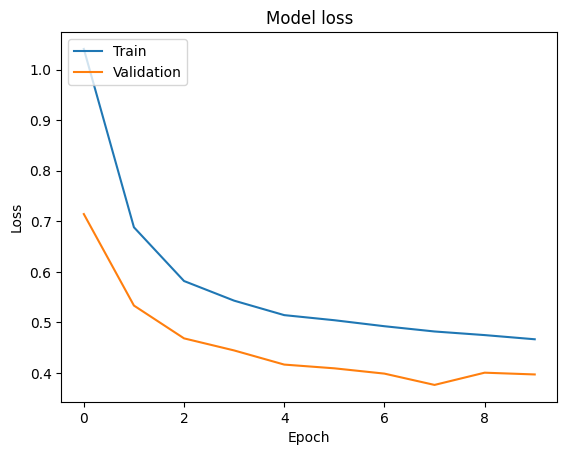

<Figure size 640x480 with 0 Axes>

In [ ]:
from keras.optimizers import RMSprop
# DEFINIR EL MODELO

# Input layer
model_norm = Sequential(name = 'my_model')
model_norm.add(Dense(5, input_dim = x_train.shape[1], name = 'hidden_layer_1'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('sigmoid'))

# Hidden layer 2
model_norm.add(Dense(5, name = 'hidden_layer_2'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('sigmoid'))

# Hidden layer 3
model_norm.add(Dense(5, name = 'hidden_layer_3'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('sigmoid'))

# Output layer
model_norm.add(Dense(10, name = 'output_layer'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('softmax'))

print (model_norm.summary())

# COMPILAR EL MODELO
model_norm.compile(
            optimizer = RMSprop(),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model_norm.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          validation_data = (x_val, y_val)
          )

# MOSTRAR HISTÓRICO DE ENTRENAMIENTO
plot_history(model_norm.history)

### **Respuestas**
Los resultados obtenidos son muy similares a los obtenidos en el caso anterior, con la única salvedad de que en la penúltima época parece haber un leve descenso en la accuracy y un leve incremento en la pérdida con respecto al valor anterior.


**Dropout** Dropout es una capa muy sencilla de utilizar. Simplemente se agrega luego de la capa de activación como una capa más, indicanto la proporción de neuronas que se desean eliminar:

```python
from keras.layers import Dropout

model.add(Dropout(.2))  # 20%

```

**Early stopping** Keras permite definir diferentes [_callbacks_](https://keras.io/callbacks/). Esto son funciones auxiliares que se ejecutan durante el entrenamiento, al terminar un batch o una epoca. Esto es muy util para monitorear el entrenamiento, y entre otras cosas implementa EarlyStopping.

Se debe definir una lista con los callbacks a ser ejecutados, y luego se pasa esta lista al metodo fit.

```python
from keras.callbacks import EarlyStopping
ea = EarlyStopping(monitor='val_loss',
                   patience=2,
                   restore_best_weights=True)

cb_list = [ea] # lista de callbacks

model.fit(x_train, y_train,
          validation_data=[x_val, y_val],
          epochs=10, batch_size=32, callbacks=cb_list);

```

**OPCIONAL: Se pide**:
Probar los métodos de DropOut y Eary Stopping. Luego, Utilizando las herramientas vistas hasta el momento, entrenar el mejor modelo posible, que tenga 2 capas ocultas.

Reportar la performance del mejor modelo encontrado sobre el conjunto de test.

Epoch 1/10
1688/1688 [==============================] - 8s 3ms/step - loss: 0.8985 - accuracy: 0.7687 - val_loss: 0.4218 - val_accuracy: 0.9080
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5670 - accuracy: 0.8450 - val_loss: 0.3128 - val_accuracy: 0.9255
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4893 - accuracy: 0.8631 - val_loss: 0.2635 - val_accuracy: 0.9337
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4441 - accuracy: 0.8736 - val_loss: 0.2365 - val_accuracy: 0.9372
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4128 - accuracy: 0.8804 - val_loss: 0.2172 - val_accuracy: 0.9427
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3852 - accuracy: 0.8879 - val_loss: 0.2030 - val_accuracy: 0.9452
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3705 - accuracy: 0.8939 - val_loss: 0.1883 - val_accuracy:

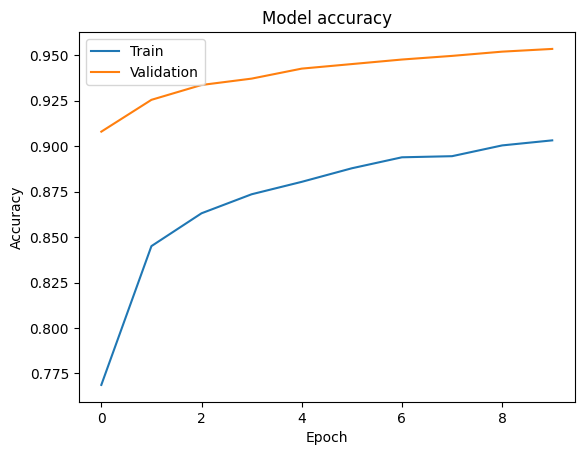

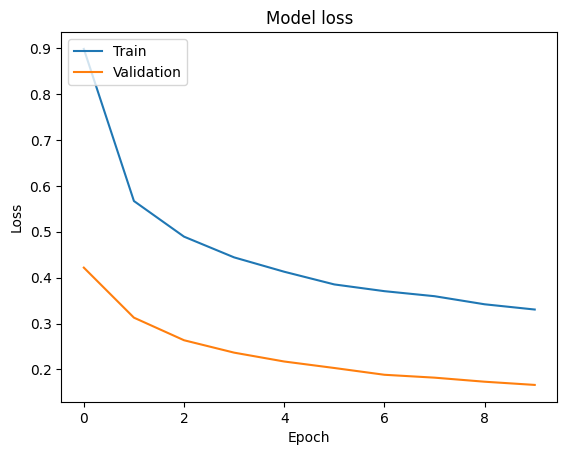

<Figure size 640x480 with 0 Axes>

In [ ]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

ea = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
cb_list = [ea] # lista de callbacks

lr = .01

# DEFINIR EL MODELO
model = Sequential(name = 'my_model')
model.add(Dense(32, input_dim = x_train.shape[1], name = 'hidden_layer'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(rate = 0.2, seed = 6))

model.add(Dense(10, name = 'output_layer'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print (model.summary())

# COMPILAR EL MODELO
model.compile(
            optimizer = SGD(learning_rate = lr),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          callbacks = cb_list,
          validation_data = (x_val, y_val)
          )

# MOSTRAR LA HISTORIA DE APRENDIZAJE
plot_history(model.history)

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.8992 - accuracy: 0.7599 - val_loss: 0.4388 - val_accuracy: 0.9020
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5865 - accuracy: 0.8392 - val_loss: 0.3204 - val_accuracy: 0.9247
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8599 - val_loss: 0.2706 - val_accuracy: 0.9325
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4555 - accuracy: 0.8685 - val_loss: 0.2431 - val_accuracy: 0.9398
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8770 - val_loss: 0.2198 - val_accuracy: 0.9417
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3972 - accuracy: 0.8859 - val_loss: 0.2028 - val_accuracy: 0.9458
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3770 - accuracy: 0.8885 - val_loss: 0.1912 - val_accuracy:

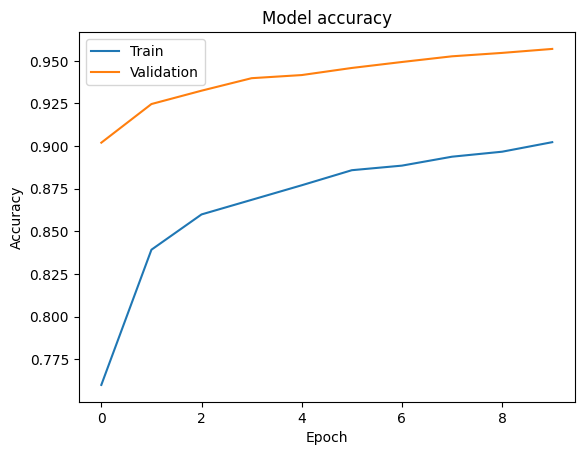

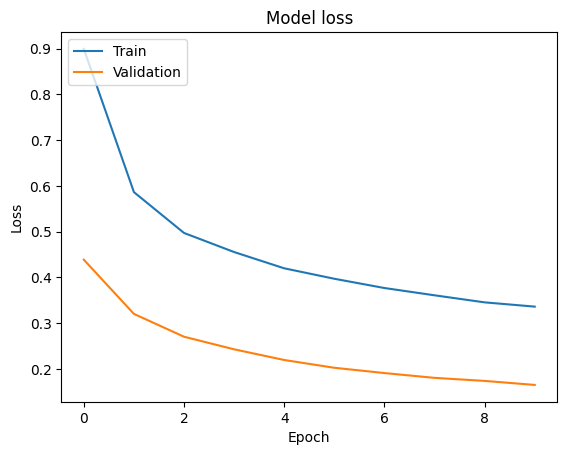

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0      0.957     0.986     0.971       980
           1      0.969     0.980     0.975      1135
           2      0.962     0.945     0.953      1032
           3      0.942     0.951     0.947      1010
           4      0.936     0.955     0.946       982
           5      0.958     0.932     0.945       892
           6      0.949     0.963     0.956       958
           7      0.959     0.946     0.952      1028
           8      0.948     0.936     0.942       974
           9      0.951     0.935     0.943      1009

    accuracy                          0.953     10000
   macro avg      0.953     0.953     0.953     10000
weighted avg      0.953     0.953     0.953     10000



<Figure size 640x480 with 0 Axes>

In [ ]:
# De todos los modelos que hice, entreno sobre el conjunto de entrenamiento el mejor
# Que fue el anterior, con lr = 0.01, dropout de 0.2 y batch normalization en todas las capas.

ea = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
cb_list = [ea] # lista de callbacks

# DEFINIR EL MODELO
model = Sequential(name = 'my_model')
model.add(Dense(32, input_dim = x_train.shape[1], name = 'hidden_layer'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(rate = 0.2, seed = 6))

model.add(Dense(10, name = 'output_layer'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# COMPILAR EL MODELO
model.compile(
            optimizer = SGD(learning_rate = 0.01),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# ENTRENAR EL MODELO
model.fit(x = x_train,
          y = y_train,
          epochs = 10,
          batch_size = 32,
          callbacks = cb_list,
          validation_data = (x_val, y_val)
          )

# MOSTRAR HISTÓRICO DE ENTRENAMIENTO
plot_history(model.history)


# Hacer las predicciones y mostrar el reporte sobre conjunto de test
predictions = model.predict(x_test)
y_test_pred = np.argmax(predictions, axis=1)
print(classification_report(y_true = y_test, y_pred = y_test_pred, digits = 3))
